# Import necessary libraries

In [1]:
import cv2 as cv   # OpenCV
import matplotlib.pyplot as plt
import numpy as np
# import seaborn as sb

### Load input data and apply grayscale

In [16]:
# display images inline in notebook
%matplotlib inline 

# IMAGE_NAME = "TEM_p_cropped.tif"
# IMAGE_NAME = "500_scale_BM_20V_200_10=200_20_BM_100 no 10.png"
IMAGE_NAME = "easy_particles.png" 

# color_image = cv.imread(IMAGE_NAME) # read a color image

# color_image = cv.cvtColor(color_image, cv.COLOR_BGR2RGB)                # convert from BGR to RGB
# not_color_image = cv.cvtColor(color_image, cv.COLOR_RGB2GRAY)           # convert color to grayscale
# gray_image = cv.imread(IMAGE_NAME, cv.IMREAD_GRAYSCALE)

color_image = cv.imread(IMAGE_NAME)
gray_image = cv.cvtColor(color_image, cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(gray_image, 0, 0, cv.THRESH_BINARY_INV+cv.THRESH_OTSU)

# reshape images to be a ndarray of pixels
# color_pixels = color_image.reshape((color_image.shape[0] * color_image.shape[1], 3))
# gray_pixels = color_image.reshape((gray_image.shape[0] * gray_image.shape[1], 3))

# plot input and grayscale input
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(25,25))
plt.axis("off")
ax0.imshow(color_image)
ax0.set_title("color image");
ax1.imshow(gray_image)
ax1.set_title("grayscale image");

UsageError: unrecognized arguments: # display images inline in notebook


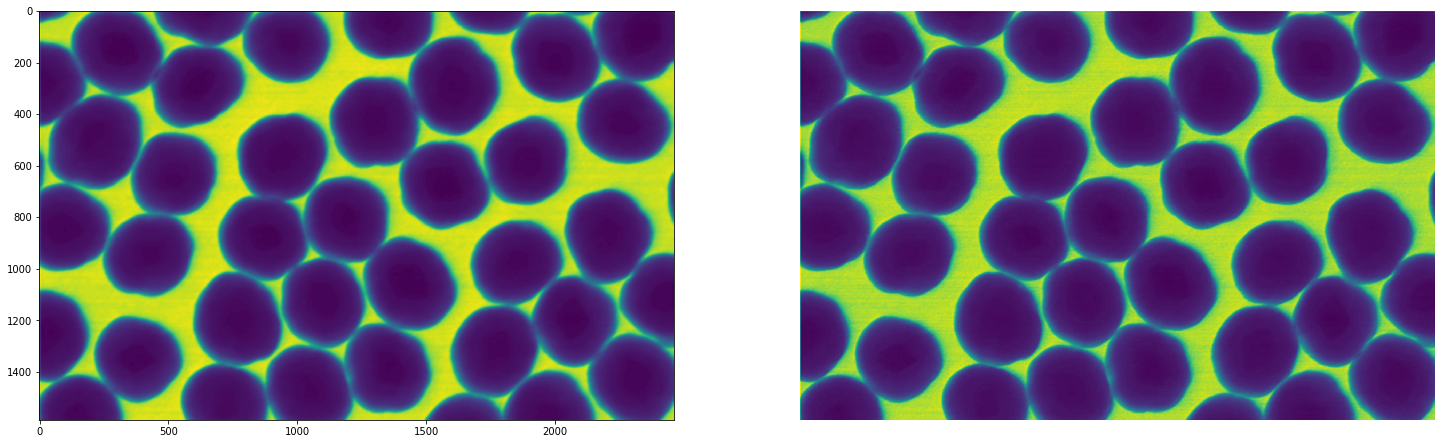

In [4]:
# apply gaussian blur
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(25,25))
plt.axis("off")
blur_1 = cv.GaussianBlur(gray_image, (0,0) ,cv.BORDER_DEFAULT) 
ax0.imshow(blur_1)
blur_2 = cv.GaussianBlur(gray_image, (5,5) ,cv.BORDER_DEFAULT) # why only (0,0), (1,1), (5,5) work?
ax1.imshow(blur_2)

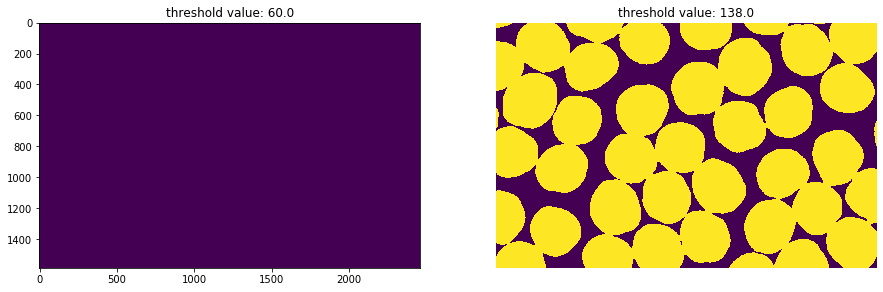

In [5]:
# auto binary threshold color image
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(15,15))
plt.axis("off")
ret_1, thresh_1 = cv.threshold(blur_1, 60, 255, cv.THRESH_BINARY)
ax0.imshow(thresh_1)
ax0.set_title("threshold value: " + str(ret_1));

# auto binary threshold grayscale image with Otsu's method
ret_2, thresh_2 = cv.threshold(blur_2, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)
ax1.imshow(thresh_2)
ax1.set_title("threshold value: " + str(ret_2));

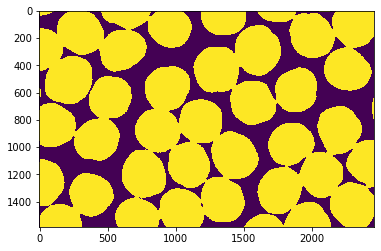

In [6]:
# find edges using Canny edge detection algorithm
edged = cv.Canny(thresh_2, 50, 255, True) 
# plt.imshow(edged)

# get contour lines only around particles and do not approximate lines
contours, hierarchy = cv.findContours(edged, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
cv.drawContours(thresh_2, contours, -1, (0,255,0), 3);

# display contours on thresholded image
plt.imshow(thresh_2)

103.48992919921875


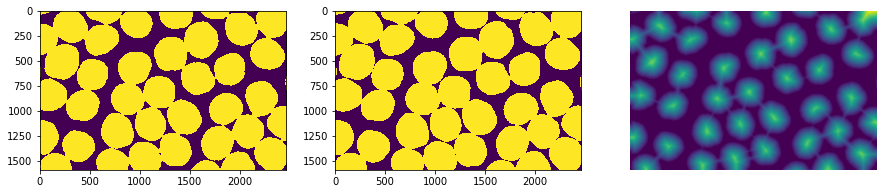

In [7]:
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(15,15))
plt.axis("off")

# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv.morphologyEx(thresh_2,cv.MORPH_OPEN,kernel, iterations = 2)
ax0.imshow(opening)
ax0.set_title("")

# sure background area
sure_bg = cv.dilate(opening,kernel,iterations=3)
ax1.imshow(sure_bg)

# Finding sure foreground area
dist_transform = cv.distanceTransform(opening,cv.DIST_L2,5)
ret, sure_fg = cv.threshold(dist_transform,0.5*dist_transform.max(),255,0)
ax2.imshow(dist_transform)
print(ret)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv.subtract(sure_bg,sure_fg)

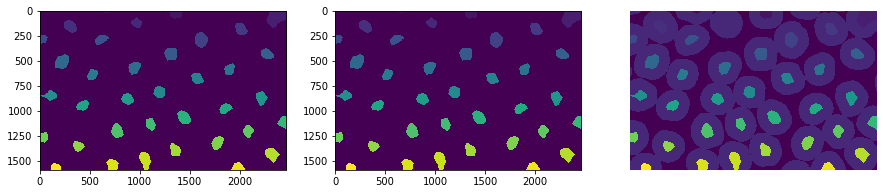

In [8]:
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(15,15))
plt.axis("off")

# Marker labelling
ret, markers = cv.connectedComponents(sure_fg)
ax0.imshow(markers)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
ax1.imshow(markers)

# Now, mark the region of unknown with zero
markers[unknown==255] = 5
ax2.imshow(markers)

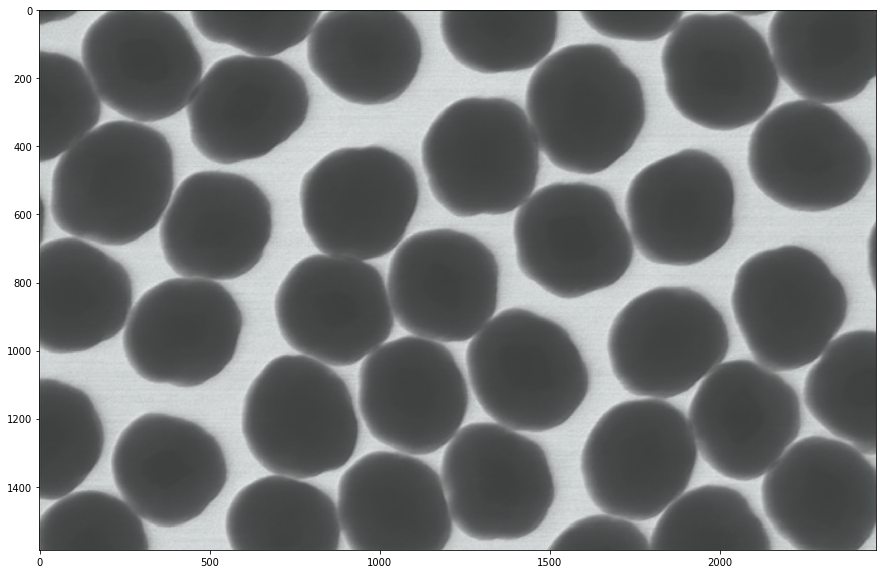

In [9]:
fix, ax = plt.subplots(1, figsize=(15,15))

markers = cv.watershed(color_image, markers)
color_image[markers == -1] = [255]

plt.imshow(color_image)

In [ ]:
# out = sb.heatmap(image_pixels)